# Please Play with SideBard Chatbot!

1. Ask any question that is in the google's help documents for google sheets, google docs, or Bard and get the answer! 

2. SideBard will say "I don't know" if it doesn't know the answer from the documents we have compiled, but may give a reasonable guess based on what it searched. 

3. Why did SideBard answer the way it did? Add `print_message=True` to the `ask` function to see the text it searched.

4. Curious for more? Look at the top 10 results from the search by adding `print_search=True` to the `ask` function.

### Dependencies

- To run this code click `run all` in your jupyter notebook. 
- You will need your own OpenAI API Key
- Finally you will have to have Python 3.9 installed with the following libraries:

OpenAI version:  0.27.8

Pandas version:  2.0.2

Seaborn version:  0.12.2

Numpy version:  1.23.4

Matplotlib version:  3.6.2

Scipy version:  1.10.1

Other Libraries: requests, ast, tiktoken, os, IPython.display, re

In [1]:
import requests

script_url = "https://raw.githubusercontent.com/scelarek/Google-Industry-Day/c846915dcecec84a210f5fd510e75a42bff24e32/SideBard%20Chatbot/function_source.py"
response = requests.get(script_url)
script_content = response.text

# Execute the fetched script
exec(script_content)


In [2]:
# from function_source import *
from api_doc import *

# OPEN_AI_KEY = your_key_here

# Choose your GPT model default is turbo
# GPT_MODEL = "gpt-3.5-turbo"

# API configuration
openai.api_key = OPEN_AI_KEY

# for LangChain
os.environ["OPENAI_API_KEY"] = OPEN_AI_KEY


In [3]:
your_question = input("What is your question? ")

display_answer_in_markdown(your_question, 'User Question')



### Category: User Question  
### Question:  
How do I delete a cell in Sheets
    ---
### Answer:  
Hello Samir! To delete a cell in Google Sheets, you can follow these steps:

1. Open the spreadsheet in Google Sheets.
2. Select the cell or cells that you want to delete.
3. Right-click on the selected cell(s) and choose "Delete cells" from the context menu.
4. In the "Delete cells" dialog box, you can choose to shift the remaining cells up or left to fill the empty space created by the deletion.
5. Click on the "Delete" button to confirm the deletion.

I hope this helps! Let me know if you have any other questions. 
    ---
    

In [4]:
# Set up the data
answers = pd.DataFrame(strings_ranked_by_relatedness(your_question, df, top_n=15))
answers = answers.T.rename(columns={0: 'Answer', 1: 'Relatedness'}).sort_values("Relatedness", ascending=False).reset_index(drop=True)
answers.head()



,Answer,Relatedness
0,"Title: Google Sheets, Description: Skip to mai...",0.811343
1,"Title: Google Sheets, Description: Skip to mai...",0.799584
2,"Title: Google Sheets, Description: Skip to mai...",0.799195
3,"Title: Google Sheets, Description: Skip to mai...",0.797044
4,"Title: Google Sheets, Description: Skip to mai...",0.793781


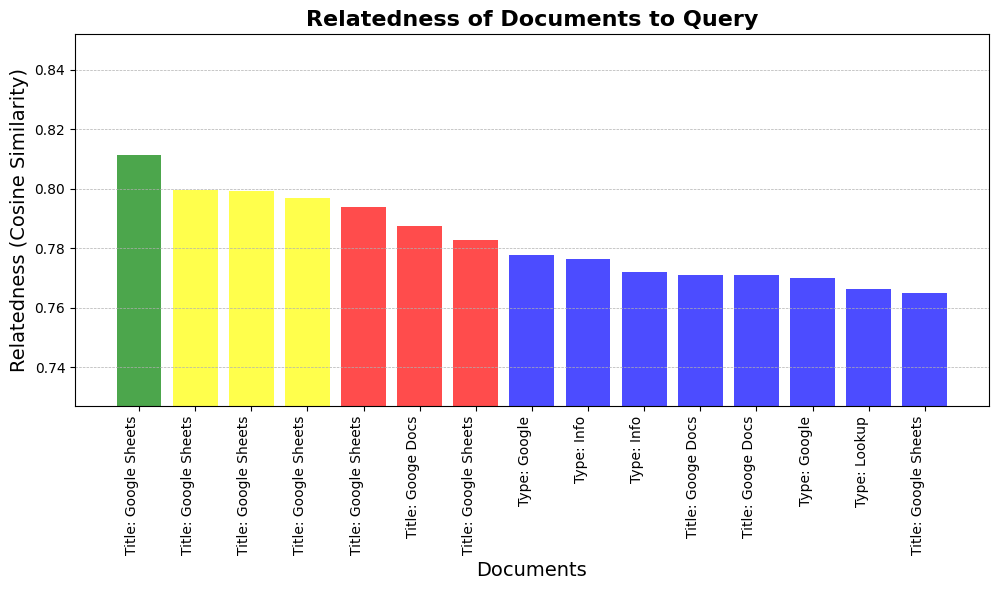

In [5]:
plot_relatedness(answers, ['blue', 'red', 'yellow', 'green'])


In [6]:
ask(your_question, print_message=True)

I'm 40 to 49 years old. I have basic knowledge about AI. Use the below articles on Google's help and user experience documentation to answer the subsequent question. If the answer cannot be found in the articles, answer to the best of your abilities but convey that you were unable to find the information with the Google Help dataset you were provided. Please say hello to Samir before offering your answer"
\Google Help article section:
"""
Title: Google Sheets, Description: Skip to main content
Help Center
Announcements
Google Workspace
Get startedLearn by productLearn by role & industryHybrid workplace tipsProductivity tipsBusiness tutorialsSwitch from Microsoft & othersSupport & accessibility
Working with remote and in-office colleagues? Learn how to thrive in hybrid work environments.


Get started with Sheets for Google Workspace
Create your first spreadsheet
Next: Share & collaborate on a spreadsheet
Want to use Google apps at work or school?  Sign up for a Google Workspace trial
"

'Hello Samir! To delete a cell in Google Sheets, you can follow these steps:\n\n1. Open the spreadsheet in Google Sheets.\n2. Select the cell or cells that you want to delete.\n3. Right-click on the selected cell(s) and choose "Delete cells" from the context menu.\n4. In the "Delete cells" dialog box, you can choose to shift the remaining cells left or up to fill the empty space created by the deletion.\n5. Click on the "Delete" button to confirm the deletion.\n\nI hope this helps! Let me know if you have any other questions.'